In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_764/2934415372.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MASS/cats.csv")

In [4]:
display(df)

,rownames,Sex,Bwt,Hwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3
...,...,...,...,...
139,140,M,3.7,11.0
140,141,M,3.8,14.8
141,142,M,3.8,16.8
142,143,M,3.9,14.4


In [5]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
rownames,144.0,72.500000,41.713307,1.0,36.75,72.5,108.250,144.0
Bwt,144.0,2.723611,0.485307,2.0,2.30,2.7,3.025,3.9
Hwt,144.0,10.630556,2.434636,6.3,8.95,10.1,12.125,20.5


In [6]:
display(df.isnull().sum())

rownames    0
Sex         0
Bwt         0
Hwt         0
dtype: int64

In [7]:
df["SexIndex"] = df["Sex"].map(lambda x : 0 if x == "F" else 1 )

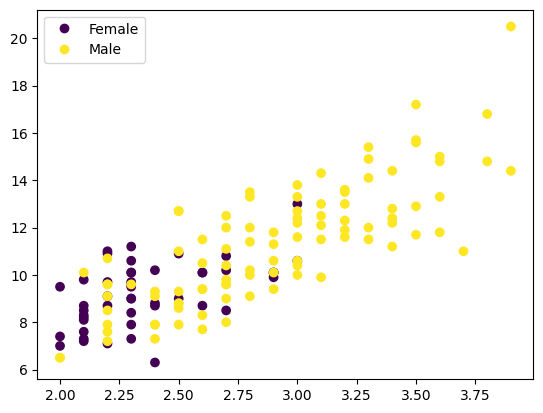

In [8]:
scatter = plt.scatter(df["Bwt"],df["Hwt"], c=df["SexIndex"])
plt.legend(handles=scatter.legend_elements()[0], labels=["Female", "Male"])
plt.show()

In [10]:
train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)

In [36]:
x = train_data[['Bwt','Hwt']]
y = train_data["SexIndex"]
x = sm.add_constant(x)

In [37]:
model = sm.Logit(y,x)

In [38]:
model_fit = model.fit()

Optimization terminated successfully.
         Current function value: 0.467227
         Iterations 7


In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               SexIndex   No. Observations:                  129
Model:                          Logit   Df Residuals:                      126
Method:                           MLE   Df Model:                            2
Date:                Thu, 29 Feb 2024   Pseudo R-squ.:                  0.2720
Time:                        11:52:53   Log-Likelihood:                -60.272
converged:                       True   LL-Null:                       -82.786
Covariance Type:            nonrobust   LLR p-value:                 1.669e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5618      1.742     -4.916      0.000     -11.975      -5.148
Bwt            3.4169      0.904      3.781      0.000       1.646       5.188
Hwt            0.0338      0.169      0.200      0.842      -0.298       0.366
==============================================================================
"""

In [40]:
predictions = model_fit.predict(x) > 0.3

conf_matrix = confusion_matrix(y, predictions)

conf_df = pd.DataFrame(conf_matrix, index=['Actual Negative (0)', 'Actual Positive (1)'], columns=['Predicted Negative (0)', 'Predicted Positive (1)'])
print("-"*70)
print("Confusion Matrix:")
print(conf_df)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

# Menghitung tingkat akurasi
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Mengubah ke persen
accuracy_percent = accuracy * 100
print('-'*70)
print(f"Tingkat Akurasi: {accuracy_percent:.4}%")

----------------------------------------------------------------------
Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                      12                      32
Actual Positive (1)                       3                      82
----------------------------------------------------------------------
Tingkat Akurasi: 72.87%


In [16]:
log_odds = model_fit.predict(x)

In [53]:
x_array = (np.array(x))

[ 7.9 10.1 11.  11.2  8.3  9.8 13.6 12.1 14.3  9.6 10.6  8.5  7.3 10.1
 15.4  8.7 11.8  8.7 10.9  8.7 13.5 12.5  9.9 13.5 12.4 10.6  7.9  7.
 11.1 10.6 10.2 12.5  9.6  9.7  9.5 11.9  8.8 10.1  9.7 10.1  8.5  9.
  9.3  9.6 14.8  6.5  6.3 13.  10.5 14.8 10.2  9.6 14.4  9.1 11.  11.8
  8.5  7.6 12.  11.5 10.1 10.9 11.5  9.  12.9  8.2 10.1 12.7 10.2 10.4
 14.9 14.4  8.3  8.7  9.9 11.6  7.2 11.  10.1  7.7 11.5  8.1 10.6  9.5
 14.1  9.1  7.2 12.4 13.  12.7  7.9 16.8  9.  13.3 12.  10.8  9.6 11.4
  6.5 10.  12.2  9.  10.7  9.4  8.8 15.   7.3  9.3 12.8 10.1 11.2 13.8
 17.2  7.4  7.9 11.7 12.2 10.  12.3  9.1  9.4 12.  20.5  8.4 12.7 13.3
  9.1 13.3 11.6]


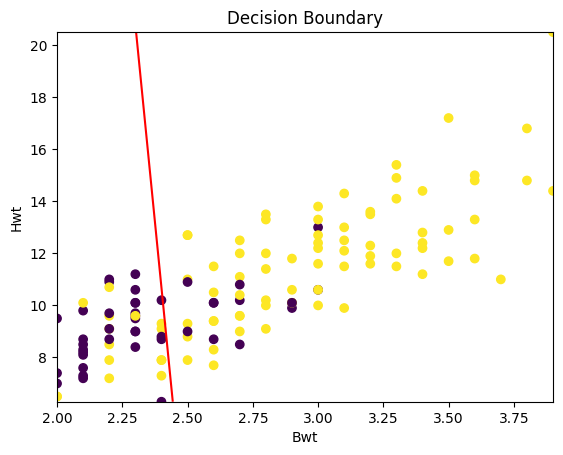

In [58]:
scatter = plt.scatter(x_array[:, 1], x_array[:, 2], c=y)

# Menyiapkan grid untuk melakukan prediksi
x_values = np.linspace(x_array[:, 1].min(), x_array[:, 1].max(), 100)
y_values = np.linspace(x_array[:, 2].min(), x_array[:, 2].max(), 100)
X_grid, Y_grid = np.meshgrid(x_values, y_values)

# Mengonversi grid ke dalam format yang sesuai dengan fitur-fitur model
grid_points = np.column_stack((X_grid.ravel(), Y_grid.ravel()))


# Menambahkan konstanta ke setiap titik grid
grid_points_with_const = sm.add_constant(grid_points)

# Melakukan prediksi menggunakan model
Z = model_fit.predict(grid_points_with_const)

# Mengubah hasil prediksi menjadi bentuk grid
Z = Z.reshape(X_grid.shape)

# Plotting kontur plot
plt.contour(X_grid, Y_grid, Z, levels=[0.5], colors='red')
plt.xlabel('Bwt')
plt.ylabel('Hwt')
plt.title('Decision Boundary')
plt.show()

In [69]:
coef = model_fit.params

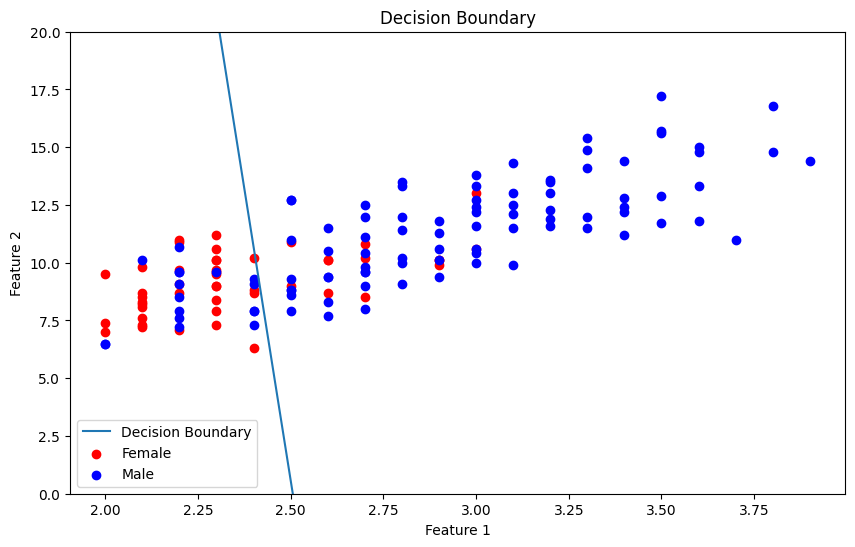

In [133]:
sex1 = df[df["SexIndex"] == 0]
sex2 = df[df["SexIndex"] == 1]
# Membuat decision boundary
x_values = np.linspace(x_array[:, 1].min(), x_array[:, 1].max(), 100)
y_values = - (coef.iloc[0] + coef.iloc[1] * x_values) / coef.iloc[2]
labels = ['Female' if label == 0 else 'Male' for label in y]

# Plotting decision boundary dan data
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(sex1["Bwt"],sex1["Hwt"], color="red", label="Female")
plt.scatter(sex2["Bwt"],sex2["Hwt"], color="blue", label="Male")
plt.legend()
plt.legend(['Female', 'Male'])
plt.legend()
plt.ylim(0,20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')


plt.show()
